Maya Asher, 4/28/24
# Analyzing the SBCSAE
**NEW CONTINUING**

Using the processed data (which can be found [here](https://github.com/Data-Science-for-Linguists-2024/Stance-Taking-in-Spontaneous-Speech/blob/main/reprocessing_sbcsae.ipynb)) we can begin our stance taking anaylsis.

Table of Contents:
1. [Object of analysis](#Object-of-analysis)
2. [Preliminary tasks](#Preliminary-tasks)
3. [Extract targets](#Extract-targets)
4. [Pipeline for outputs](#Pipeline-for-outputs)
5. [Quick visualization](#Quick-visualization)
6. [Analyze the annotated data](#Analyze-the-annotated-data)
7. [Visualizations](#Visualizations)
8. [Statistical tests](#Statistical-tests)

## Object of analysis
**TL;DR**: This analysis will focus on lexical items and discourse markers that vary in their levels of investment (ex: *like* vs. *love*). This is based on a three dimensional model of analyzing stance and stanctaking explained in Kiesling (2022).
### Background
As Dr. Scott Kiesling discusses in his paper "Stance and Stancetaking" (2022), stance is how people position themselves in conversations and it can be analyzed using a three-dimensional model that encompasses **evaluation**, **alignment**, and **investment**. In a simple conversation, animator A evaluates an object, prompting animator B to also evaluate that object, resulting in an alignment or disalignment between the two interlocutors. Investment is the extent to which each person commits to their evaluation. 

So, for example, if I were to say "I really love data science," I am indexing a large amount of investment to my evaluation of data science. Then, if my interlocutor were to respond, "I kind of like data science," we are somewhat aligning by speaking of data science in a positive light, but they are indexing less investment in their evaluation than I am. 

In the example above, investment was indexed through the lexical items *really love* and *kind of like*, but an animator's level of investment can also be indicated through epistemicity and evidentiality.

In this three-dimensional model of analysis, there are also three participant roles: the **author** who composes the essential text, the **animator** who produces the speech, and the **principal** who takes responsibility for the utterance. This idea will be explored later on in the analysis.
### Current investigation
With the idea of investment established, my focus for this project will be to identify lexical items that index varying levels of investment and analyze their contexts and frequencies, producing both qualitative and quantitative results that can be compared to one another. 

Specifically, I will look at lexical items and discourse markers that vary in thier predicted levels of investment (`like`, `love`, `fine`, `good`, `great`, `I mean`, `might`, `always`, `maybe`, and `very`). To do this, we will unpickle our dictionaries of data frames and begin our search for our target words.

### Citation
Kiesling, S. F. (2022). Stance and Stancetaking. *Annual Review of Linguistics*, 8, 409-426. https://doi.org/10.1146/annurev-linguistics-031120-121256

## Preliminary tasks
### Import

In [1]:
import pickle
import matplotlib.pyplot as plt
import re
import ast
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
%pprint

Pretty printing has been turned OFF


### Unpickle

In [2]:
f = open('../all_dfs.pkl', 'rb')
dfs = pickle.load(f)
f.close()

In [3]:
len(dfs) # perfect!

43

In [4]:
dfs['SBC001.trn'].head()

,time,speaker,text
0,0.00 9.21,LENORE:,... So you don't need to go ... borrow equipme...
1,9.21 9.52,,to --
2,9.52 14.10,,... to do the feet?
3,14.10 15.78,,... [Do the hooves]?
4,15.01 16.78,LYNNE:,"[(H)=] <YWN Well,"


In [5]:
dfs['SBC060.trn'].head() # looks good!

,time_start,time_end,speaker,text
0,0.000,2.572,ALAN:,"... (H) I got a story to tell you,"
1,2.572,3.820,,"it's a shaggy dog story,"
2,3.820,6.645,,but as long as were talking about that record...
3,6.645,8.378,,"(H)= Ill tell you the story,"
4,8.378,10.178,,"(H)= oh gosh,"


## Extract targets
The two *lexical items* we want are `like` and `love` and the eight *discourse markers* we want are `fine`, `good`, `great`, `I mean`, `might`, `always`, `maybe`, and `very`. 


We will create a dictionary for each word with the key being the file name (ex: `SBC001.trn`) and the value being a list of tuples that look like (row number, 'like' in context). Thankfully, we can work with `dfs` because all the `text` columns are labeled as such.

In [6]:
# master dictionary
dicts = {
    'likes': {}, 'loves': {}, 'fines': {}, 'goods': {}, 'greats': {},
    'imeans': {}, 'mights': {}, 'always': {}, 'maybes': {}, 'verys': {}
}

# corresponding regexs
terms = {
    'likes': r'\blike[^,]\b', 'loves': r'\blove\b', 'fines': r'\bfine\b',
    'goods': r'\bgood\b', 'greats': r'\bgreat\b', 'imeans': r'\bI\smean\b',
    'mights': r'\bmight\b', 'always': r'\balways\b', 'maybes': r'\bmaybe\b',
    'verys': r'\bvery\b'
}

# initialize term counter
total_counts = {key: 0 for key in terms}

# process each df in `dfs`
for df_name, df in dfs.items():
    
    for key, regex in terms.items():
        
        # extract rows where the target word is found in the text column
        rows = df[df['text'].str.contains(regex, case=False, regex=True, na=False)]
        
        # list of tuples containing (row #, text) for each occurrence
        occurrences = [(index, row['text']) for index, row in rows.iterrows()]
        
        # save occurrences in the corresponding dict
        dicts[key][df_name] = occurrences
        
        # update total counts
        total_counts[key] += len(occurrences)
        
# print total counts for each term
running = 0
for term, count in total_counts.items():
    print(f"Total occurrences of '{term}':", count)
    running += count
print("Total occurrences:", running)

Total occurrences of 'likes': 1188
Total occurrences of 'loves': 68
Total occurrences of 'fines': 63
Total occurrences of 'goods': 390
Total occurrences of 'greats': 115
Total occurrences of 'imeans': 432
Total occurrences of 'mights': 93
Total occurrences of 'always': 159
Total occurrences of 'maybes': 182
Total occurrences of 'verys': 187
Total occurrences: 2877


In [7]:
# initialize dicts and transfer data from master dictionary
likes = {}
likes = dicts['likes']

loves = {}
loves = dicts['loves']

fines = {}
fines = dicts['fines']

goods = {}
goods = dicts['goods']

greats = {}
greats = dicts['greats']

imeans = {}
imeans = dicts['imeans']

mights = {}
mights = dicts['mights']

always = {}
always = dicts['always']

maybes = {}
maybes = dicts['maybes']

verys = {}
verys = dicts['verys']

## Pipeline for outputs
This code creates text files that show each occurrence of each target word in 20 lines of context. The output files can be found in the [`targets_w_context/`](https://github.com/Data-Science-for-Linguists-2024/Stance-Taking-in-Spontaneous-Speech/tree/main/targets_w_context) folder.

In [8]:
targets = [likes, loves, fines, goods, greats, imeans, mights, always, maybes, verys]
targets_str = ['likes', 'loves', 'fines', 'goods', 'greats', 'imeans', 'mights', 'always', 'maybes', 'verys']
count = 0

for target in targets:
    # establish indices
    indices = {key: [tpl[0] for tpl in value] for key, value in target.items()}
    
    # write out file
    with open(targets_str[count]+"_output.txt", 'w') as file:
    
        import sys
        sys.stdout = file
        
        for index in indices:
            df = dfs[index]
            print(index)
            key = index
            values = indices[key]
            # give 20 lines of context
            for v in values:
                first = v - 10
                last = v + 10
                print(df.iloc[first:last])
    count+=1
            
    sys.stdout = sys.__stdout__

[(516, 'H')] [(820, 'L')] [(390, 'H')] []
<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, SBC001 to SBC060
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Maybe   43 non-null     object
 1   Love    43 non-null     object
 2   Great   43 non-null     object
 3   Fine    43 non-null     object
dtypes: object(4)
memory usage: 2.7+ KB
F-Statistic: [ 9.53913139 19.64571181], P-value: [7.48271837e-06 5.76484848e-11]


## Quick visualization
We can see that there is an uneven distribution of target word counts, but that is most likely due to many factors like word frequency in spontaneous speech, word frequency in different dialects, and varying meanings for each word, among other things.

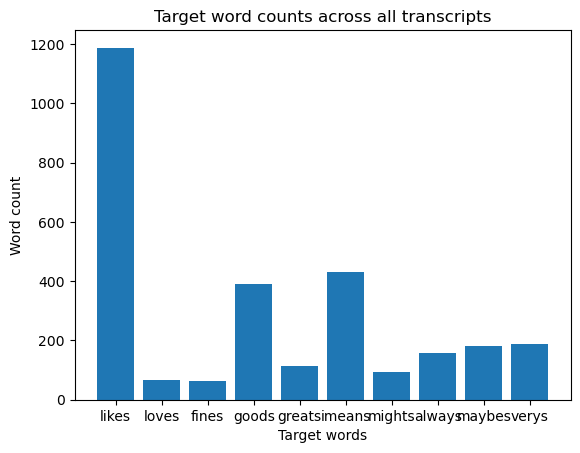

In [9]:
fig, ax = plt.subplots()

keys = list(total_counts.keys())
values = list(total_counts.values())

ax.bar(keys, values)
plt.xlabel('Target words')
plt.ylabel('Word count')
plt.title('Target word counts across all transcripts')

plt.show()

## Analyze the annotated data
At the time of this analysis, only 4 of the 10 target words have been annotated, so we will only be focusing on the words `maybe`, `love`, `great`, and `fine`. The annotations can be found in [`annotations/`](https://github.com/Data-Science-for-Linguists-2024/Stance-Taking-in-Spontaneous-Speech/tree/main/annotations).

### Importing as dictionaries
Not all the files had the target words to begin with, so empty lists are to be expected.

In [10]:
with open('../annotations/love_dict.txt', 'r') as file:
    data = file.read()
    love_dict = ast.literal_eval(data)
with open('../annotations/maybe_dict.txt', 'r') as file:
    data = file.read()
    maybe_dict = ast.literal_eval(data)   
with open('../annotations/great_dict.txt', 'r') as file:
    data = file.read()
    great_dict = ast.literal_eval(data)
with open('../annotations/fine_dict.txt', 'r') as file:
    data = file.read()
    fine_dict = ast.literal_eval(data)
    
# making sure it all imported...yup!
print(love_dict['SBC060'], maybe_dict['SBC060'], great_dict['SBC060'], fine_dict['SBC060'])

### Create a df
Now let's combine all the dictionaries into one big dataframe.

In [11]:
# create a df with an index of filenames and columns for each target word
df = pd.DataFrame(index=sorted(set(maybe_dict.keys()).union(love_dict.keys(), great_dict.keys(), fine_dict.keys())),
                  columns=["Maybe", "Love", "Great", "Fine"])

# populate the df with the data
for idx in df.index:
    df.loc[idx, "Maybe"] = maybe_dict.get(idx, [])
    df.loc[idx, "Love"] = love_dict.get(idx, [])
    df.loc[idx, "Great"] = great_dict.get(idx, [])
    df.loc[idx, "Fine"] = fine_dict.get(idx, [])

df.fillna("[]", inplace=True)  # replace NaNs with empty lists for clarity

In [12]:
df.head()

,Maybe,Love,Great,Fine
SBC001,"[(559, L), (929, L), (993, L), (994, L), (1239...",[],[],[]
SBC002,"[(883, L), (1103, L), (1112, L), (1254, L), (1...",[],"[(205, H)]","[(1260, H)]"
SBC003,"[(1272, L)]","[(1008, H), (1262, H)]","[(163, H), (440, L), (534, H), (857, H), (869,...","[(198, L), (754, L), (778, L), (1176, L), (122..."
SBC004,"[(27, L), (292, L)]","[(68, H), (70, H), (163, H)]","[(26, H), (672, L)]","[(921, L)]"
SBC005,"[(325, L), (359, L), (360, L), (365, L), (366,...",[],[],[]


In [13]:
df.tail()

,Maybe,Love,Great,Fine
SBC056,"[(283, L), (1503, L)]","[(917, H)]","[(87, H), (99, H), (105, H), (985, H), (1090, ...","[(108, H), (1249, L), (1561, L)]"
SBC057,[],"[(172, H)]",[],"[(178, H), (508, H), (617, L), (659, H), (661,..."
SBC058,"[(187, L), (653, L), (666, L)]","[(244, H)]","[(748, H)]","[(869, L)]"
SBC059,"[(991, L), (1557, L), (1804, L), (1827, L)]","[(1335, H)]",[],"[(748, L)]"
SBC060,"[(820, L)]","[(516, H)]","[(390, H)]",[]


In [14]:
# looks good!
df.info()

In [15]:
# "maybe" has the most occurrences across all transcripts
# "love" has the least
df.describe()

,Maybe,Love,Great,Fine
count,43,43,43,43
unique,40,23,30,27
top,[],[],[],[]
freq,4,21,14,17


### Count up Hs and Ls

In [16]:
# function that counts 'H' and 'L' in each list of tuples
def count_h_l(tuples):
    count_h = sum(1 for _, label in tuples if label == 'H')
    count_l = sum(1 for _, label in tuples if label == 'L')
    return count_h, count_l

In [17]:
# apply to each cell in the df
df_counts = df.applymap(count_h_l)

In [18]:
# create new cols for total counts of H and L in each row
df['Total H'] = df_counts.apply(lambda x: sum(item[0] for item in x), axis=1)
df['Total L'] = df_counts.apply(lambda x: sum(item[1] for item in x), axis=1)

In [19]:
df.head() # looks good!

,Maybe,Love,Great,Fine,Total H,Total L
SBC001,"[(559, L), (929, L), (993, L), (994, L), (1239...",[],[],[],0,8
SBC002,"[(883, L), (1103, L), (1112, L), (1254, L), (1...",[],"[(205, H)]","[(1260, H)]",2,7
SBC003,"[(1272, L)]","[(1008, H), (1262, H)]","[(163, H), (440, L), (534, H), (857, H), (869,...","[(198, L), (754, L), (778, L), (1176, L), (122...",12,7
SBC004,"[(27, L), (292, L)]","[(68, H), (70, H), (163, H)]","[(26, H), (672, L)]","[(921, L)]",4,4
SBC005,"[(325, L), (359, L), (360, L), (365, L), (366,...",[],[],[],0,12


In [20]:
# (H, L)
df_counts.head()

,Maybe,Love,Great,Fine
SBC001,"(0, 8)","(0, 0)","(0, 0)","(0, 0)"
SBC002,"(0, 7)","(0, 0)","(1, 0)","(1, 0)"
SBC003,"(0, 1)","(2, 0)","(10, 1)","(0, 5)"
SBC004,"(0, 2)","(3, 0)","(1, 1)","(0, 1)"
SBC005,"(0, 12)","(0, 0)","(0, 0)","(0, 0)"


Using `df_counts`, let's count up the totals for each target word

In [21]:
# function to count up number in tuples
def sum_tuples(column):
    # initialize counters
    total_h = 0
    total_l = 0
    
    # iterate through each tuple in the column
    for h, l in column:
        total_h += h
        total_l += l
        
    return total_h, total_l

In [22]:
# apply the function to each column and store the results
totals = {col: sum_tuples(df_counts[col]) for col in df_counts.columns}

# convert the results to a DataFrame for nicer display
totals_df = pd.DataFrame(totals, index=['H', 'L']).T  # .T to transpose for better readability

totals_df

,H,L
Maybe,0,162
Love,51,0
Great,99,5
Fine,8,52


Looks like `maybe` and `love` are pretty decisive in the investment they convey, but `great` and `fine` have a bit of ambiguity depending on the context they are used in.

## Visualizations
To reorient ourselves, `H` stands for higher and `L` stands for lower, both refering to the level of investment the animator (or their subject) has in their evaluation. 

For example, if I said "I *love* coding," I would label that utterance with `H`, but if I said "Yeah, coding is *fine*," I would label that `L`.
### H and L counts
First, let's get the counts for Hs and Ls for each target word.

In [23]:
# function to aggregate H and L counts for each category
def aggregate_counts(tuples):
    total_h = sum(h for h, _ in tuples)
    total_l = sum(l for _, l in tuples)
    return total_h, total_l

In [24]:
# apply to each column to get aggregated H and L counts
category_totals = {col: aggregate_counts(df_counts[col]) for col in df_counts.columns}

In [25]:
# prepare data for plotting
categories = list(category_totals.keys())
h_counts = [category_totals[cat][0] for cat in categories]
l_counts = [category_totals[cat][1] for cat in categories]
index = np.arange(len(categories))

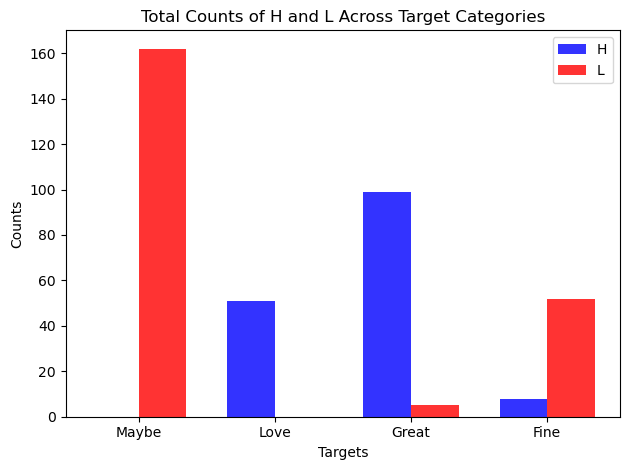

In [26]:
# set up the bar graph
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index - bar_width/2, h_counts, bar_width, alpha=opacity, color='b', label='H')
rects2 = ax.bar(index + bar_width/2, l_counts, bar_width, alpha=opacity, color='r', label='L')

# add labels, title, and custom x-axis tick labels
ax.set_xlabel('Targets')
ax.set_ylabel('Counts')
ax.set_title('Total Counts of H and L Across Target Categories')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.savefig('hl_counts.png')
plt.show()

### NORMALIZED H and L counts
Since the counts for each category vary greatly, let's use proportional scaling to normalize the data and re-plot it.

In [27]:
# normalize data by converting counts to proportions
def normalize_counts(tuples):
    total = sum(sum(tup) for tup in tuples)
    if total == 0:
        return [(0, 0)]  # Avoid division by zero, return a list of tuples
    return [(h / total, l / total) for h, l in tuples]

In [28]:
# normalize
normalized_data = {col: normalize_counts(df_counts[col]) for col in df_counts.columns}

# aggregate normalized data for each category
category_totals = {col: (sum(h for h, _ in normalized_data[col]), sum(l for _, l in normalized_data[col])) for col in normalized_data.keys()}

In [29]:
# prepare data for plotting
categories = list(category_totals.keys())
h_props = [category_totals[cat][0] for cat in categories]
l_props = [category_totals[cat][1] for cat in categories]
index = np.arange(len(categories))

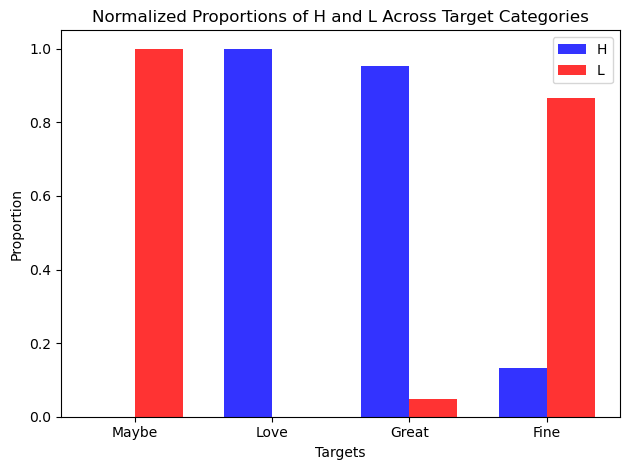

In [30]:
# set up the bar graph
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index - bar_width/2, h_props, bar_width, alpha=opacity, color='b', label='H')
rects2 = ax.bar(index + bar_width/2, l_props, bar_width, alpha=opacity, color='r', label='L')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Targets')
ax.set_ylabel('Proportion')
ax.set_title('Normalized Proportions of H and L Across Target Categories')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.savefig('norm_counts.png')
plt.show()

### Transcripts with the highest counts

In [31]:
# subset with Hs and Ls that are larger than 10
above10 = df[(df['Total H'] > 10) | (df['Total L'] > 10)]
above10.head()

,Maybe,Love,Great,Fine,Total H,Total L
SBC003,"[(1272, L)]","[(1008, H), (1262, H)]","[(163, H), (440, L), (534, H), (857, H), (869,...","[(198, L), (754, L), (778, L), (1176, L), (122...",12,7
SBC005,"[(325, L), (359, L), (360, L), (365, L), (366,...",[],[],[],0,12
SBC015,"[(1896, L)]","[(236, H), (237, H), (1308, H), (1475, H), (14...","[(291, H), (855, L), (996, H), (1123, H), (112...","[(1049, L)]",11,3
SBC016,"[(929, L), (1082, L), (1107, L), (1272, L)]","[(1000, H)]","[(713, H), (914, H), (1034, H), (1146, H), (11...","[(987, L), (989, L), (1267, L)]",11,7
SBC023,"[(101, L), (151, L), (174, L), (292, L), (422,...",[],"[(912, H)]",[],1,12


In [32]:
len(above10)

10

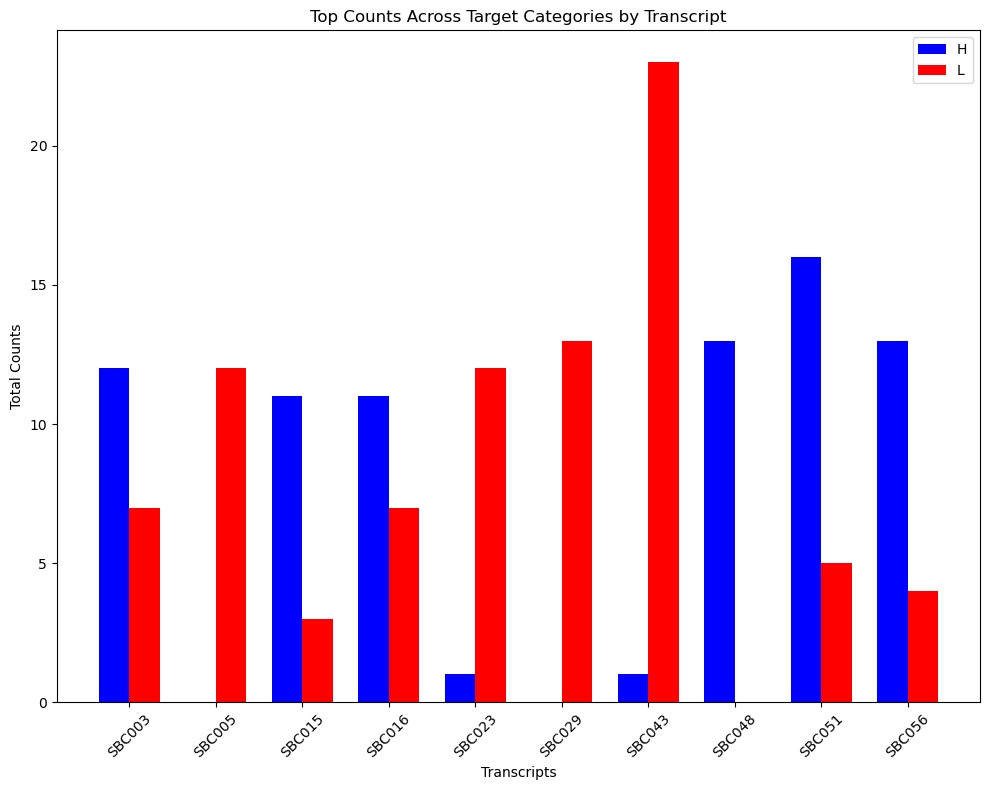

In [33]:
# set up the bar graph
fig, ax = plt.subplots(figsize=(10, 8))
index = np.arange(len(above10))  # the label locations
bar_width = 0.35  # the width of the bars

rects1 = ax.bar(index - bar_width/2, above10['Total H'], bar_width, label='H', color='blue')
rects2 = ax.bar(index + bar_width/2, above10['Total L'], bar_width, label='L', color='red')

# add labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Transcripts')
ax.set_ylabel('Total Counts')
ax.set_title('Top Counts Across Target Categories by Transcript')
ax.set_xticks(index)
ax.set_xticklabels(above10.index)
ax.legend()

# rotate the tick labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('top_counts.png')
plt.show()

## Statistical tests
My data doesn't really warrant any statistical tests, but I will run a couple because it is good practice. Let's run a One-Way ANOVA test with the normalized data.

In [34]:
# One-Way ANOVA
f_stat, p_value = f_oneway(normalized_data['Maybe'],
                           normalized_data['Love'],
                           normalized_data['Great'],
                           normalized_data['Fine'])

print(f"F-Statistic: {f_stat}, P-value: {p_value}")


The output has high F-Stats and low P-values, so the groups are statistically significant. This makes sense because the groups (the target words) vary drastically. This ANOVA test doesn't really tell us much, but was good to conduct anyway. 